In [11]:
import torch
import random
import matplotlib.pyplot as plt
import numpy

In [12]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [13]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.5901,  0.2791]) 
label: tensor([2.0798])


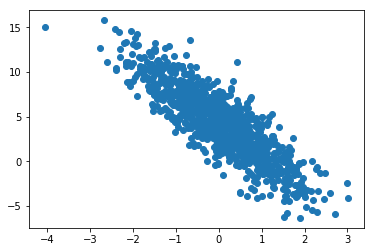

In [15]:
plt.scatter(features.numpy()[:,1],labels.numpy())

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [17]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [23]:
def squared_loss(y_hat, y):  
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [18]:
def linreg(X, w, b):  
    return torch.matmul(X, w) + b

In [20]:
def sgd(params, lr, batch_size):  
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [26]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  
        l.sum().backward()
        sgd([w, b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print("epoch :",epoch+1)
        print("loss: ",train_l.mean())

epoch : 1
loss:  tensor(5.3418e-05)
epoch : 2
loss:  tensor(5.3395e-05)
epoch : 3
loss:  tensor(5.3286e-05)


In [27]:
print("error in w :",true_w - w.reshape(true_w.shape))
print("error in b :",true_b - b)

error in w : tensor([-1.4949e-04, -3.0756e-05], grad_fn=<SubBackward0>)
error in b : tensor([0.0006], grad_fn=<RsubBackward1>)
